# Prediction of cancer 

### Introduction: 

In this project we are going to prepare a statistical model in order to predict whether the given patient is having breast cancer or not.

### Data:
Using the Wisconsin breast cancer diagnostic data set for predictive analysis¶
Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each 
image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


### Importing libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import neighbors, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

In [11]:
df_cancer=pd.read_csv("wdbc.txt",header=None)

In [14]:
df_cancer.columns=["ID","Diagnosis","radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmetry","fractal_dimension"
                  ,"f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20"]

In [15]:
df_cancer.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking for the null values

In [17]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                   569 non-null int64
Diagnosis            569 non-null object
radius               569 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
concave_points       569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
f1                   569 non-null float64
f2                   569 non-null float64
f3                   569 non-null float64
f4                   569 non-null float64
f5                   569 non-null float64
f6                   569 non-null float64
f7                   569 non-null float64
f8                   569 non-null float64
f9                   569 non-null float64
f10             

### Looks like there are no null values and now let us check if there are any outliers or any values which are unexpected.

In [19]:
df_cancer.describe()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,...,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the above values it seems that all the values present in each column are in an expected range so no need to any manipulation or conversion in this case.

### Checking the variance in the column
The main reason to check the variance or number of distinct columns is to come to know which columns are significant for the dependant variable. The columns with least variance or zero variance can be deleted from the scope as it is not showing any effect on the output column.

In [20]:
df_cancer.nunique()

ID                   569
Diagnosis              2
radius               456
texture              479
perimeter            522
area                 539
smoothness           474
compactness          537
concavity            537
concave_points       542
symmetry             432
fractal_dimension    499
f1                   540
f2                   519
f3                   533
f4                   528
f5                   547
f6                   541
f7                   533
f8                   507
f9                   498
f10                  545
f11                  457
f12                  511
f13                  514
f14                  544
f15                  411
f16                  529
f17                  539
f18                  492
f19                  500
f20                  535
dtype: int64

From the above values we can see that all the columns have a wide number of distinct values. So we can keep all the columns exept the ID column as it does not make any difference.

In [33]:
df_cancer.drop(['ID'],axis=1,inplace=True)

### Exploratory Data Analysis
Now since we are done with data cleaning. Let us go ahead with the exploratory data analysis.

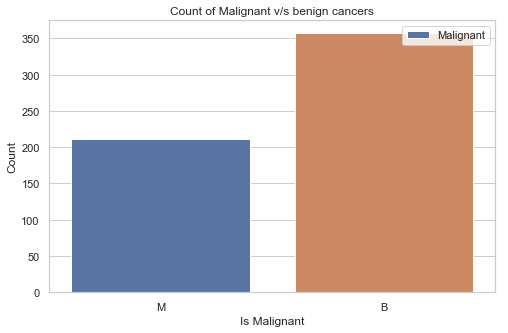

In [24]:
# plotting the benign and malignant cells
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(df_cancer['Diagnosis'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("Is Malignant")
plt.ylabel("Count")
plt.title("Count of Malignant v/s benign cancers")
plt.show()

Froom the above figuren we can see that there are more benign than malgnant cancer cells in the dataset which is expected.

C:\Users\nkuma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


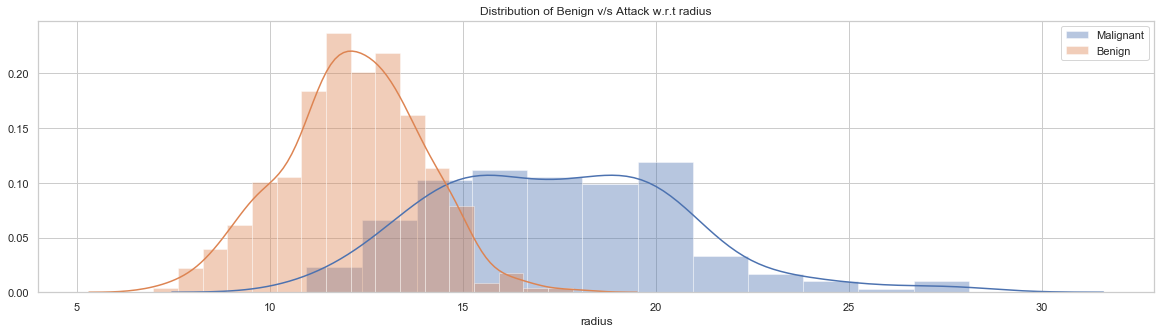

In [26]:
# plotting the radius for benign Vs Malignant
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "M"]['radius'])
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "B"]['radius'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("radius")
plt.title("Distribution of Benign v/s Attack w.r.t radius")
plt.show()

From the above plot we can clearly see that distribution of radius for malignant cells are higher than the cells which are benign.

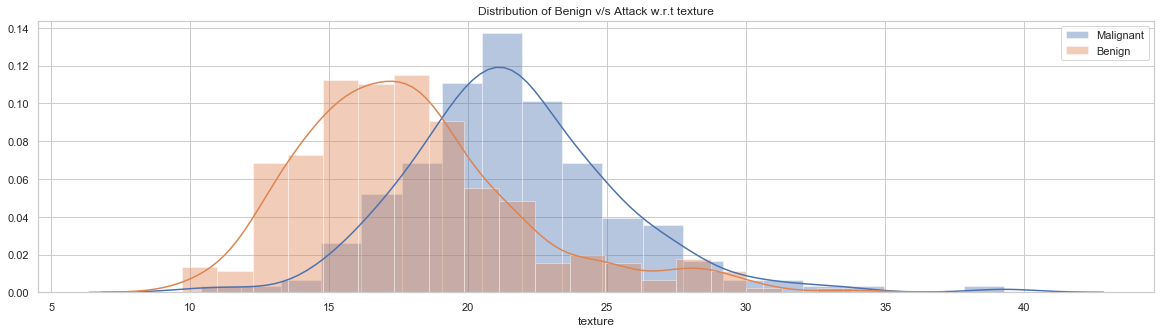

In [27]:
# plotting the texture for benign Vs Malignant
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "M"]['texture'])
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "B"]['texture'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("texture")
plt.title("Distribution of Benign v/s Attack w.r.t texture")
plt.show()

Same is the case with the texture i.e. the distribution of texture for malignant is more than the normal cells.

Since there is significant change in the distribution of radius we can say that there would be significant change in the distribution of area and perimeter between malignant and benign cells.

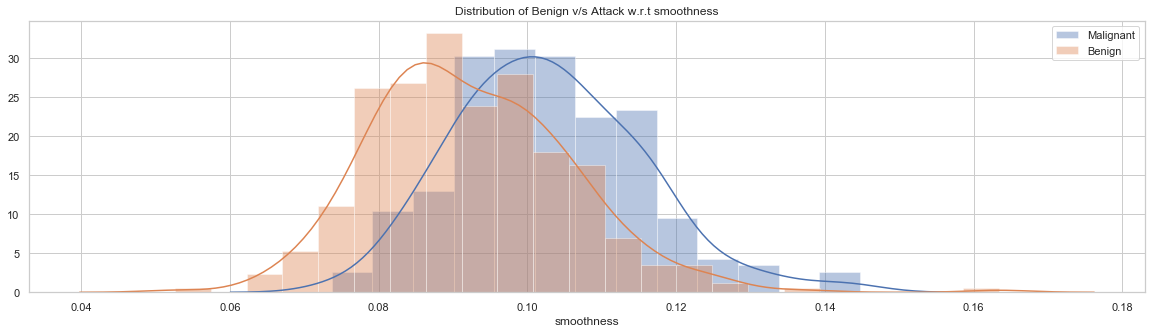

In [28]:
# plotting the smoothness for benign Vs Malignant
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "M"]['smoothness'])
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "B"]['smoothness'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("smoothness")
plt.title("Distribution of Benign v/s Attack w.r.t smoothness")
plt.show()

The malignant cell have a little higher value of smoothness than the benign cells.

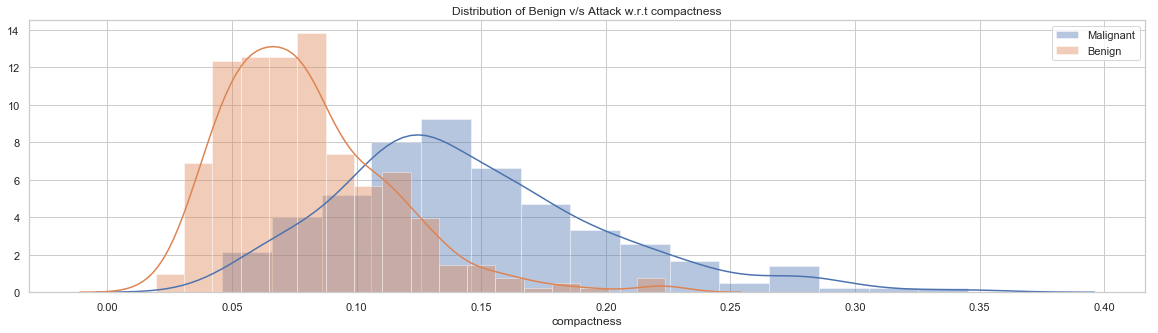

In [29]:
# plotting the compactness for benign Vs Malignant
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "M"]['compactness'])
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "B"]['compactness'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("compactness")
plt.title("Distribution of Benign v/s Attack w.r.t compactness")
plt.show()

Same is the case with compactness. Malignant cells have more compactness than benign

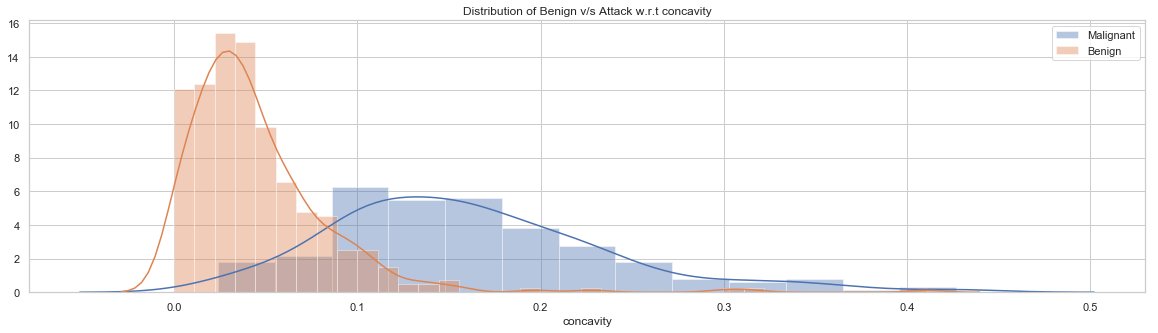

In [31]:
# plotting the concavity for benign Vs Malignant
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "M"]['concavity'])
sns.distplot(df_cancer[df_cancer['Diagnosis'] == "B"]['concavity'])
plt.legend(["Malignant","Benign"],loc = 'upper right')
plt.xlabel("concavity")
plt.title("Distribution of Benign v/s Attack w.r.t concavity")
plt.show()

Same is the case with concavity. Malignant cell have higher concavity.

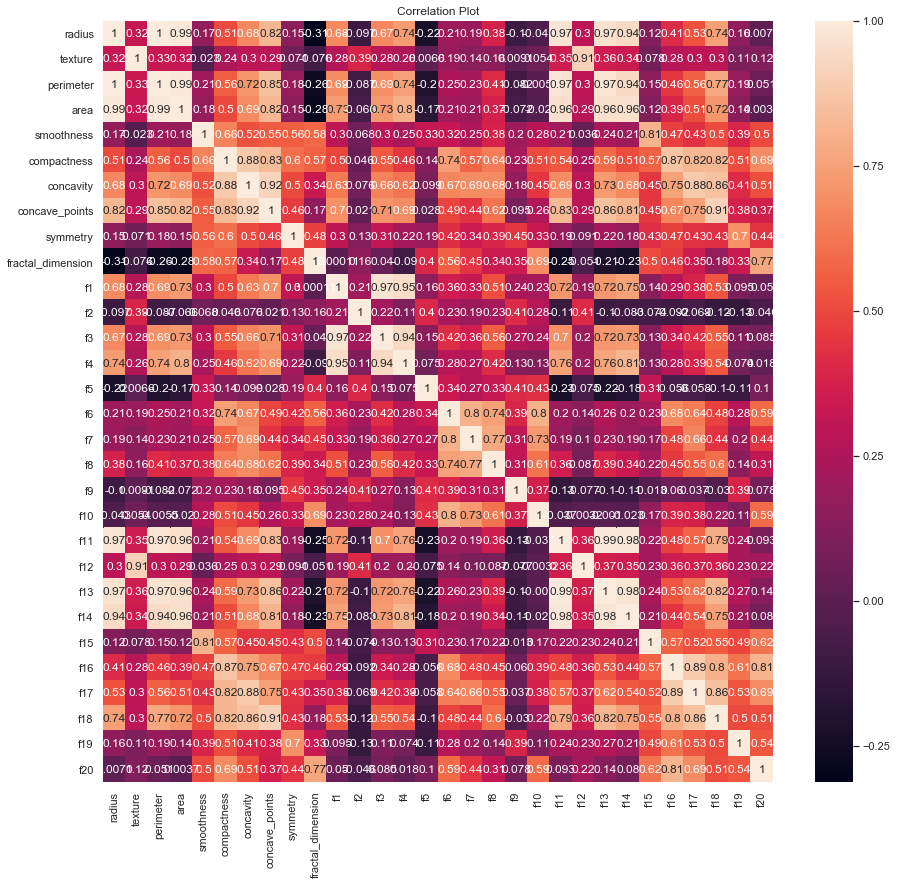

In [81]:
# plotting the correlation between different features
# this plot helps us in removing the features which are strongly related
sns.set(rc={'figure.figsize':(15,14)})
corr = df_cancer.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
plt.title("Correlation Plot")
plt.show()

From the above plot it is not easy to keep an eye on all the columns, so let us put a threshold of 0.85 and see only the columns that have correlation greater than 0.85

In [45]:
df_cancer.corr()[df_cancer.corr()>0.85]

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
radius,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
area,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865809,NaN,NaN,NaN,NaN
concavity,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884103,0.861323,NaN,NaN
concave_points,NaN,NaN,0.850977,NaN,NaN,NaN,0.921391,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855923,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1) From the above we can clearly see that radius, perimeter, area, f11,f13,f14 are highly correlated.

2) Texture is highly correlated with f12

3) Compactness is highly correlated with concavity, concave points, f17 and f18

4) f1, f3, f4 are highly correlated

In order to reduce computation speed or when we are trying to work out any statististical model it is highly recommended to drop the columns that contain redundant information. But how do we drop them? The best way to drop the columns is based on the variance concept. Keep the column with highest variance and drop the rest of the columns. But before calculating the variance lwt us get them to the same scale.

In [103]:
Xdata = df_cancer.drop('Diagnosis', axis=1)
scaler = StandardScaler()
Xdata_new_d = pd.DataFrame(scaler.fit_transform(Xdata),columns=["radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmetry","fractal_dimension"
                  ,"f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20"])

In [65]:
print(" The variance of radius",Xdata_new_d.radius.var())
print(" The variance of area",Xdata_new_d.area.var())
print(" The variance of perimeter",Xdata_new_d.perimeter.var())
print(" The variance of f11",Xdata_new_d.f11.var())
print(" The variance of f13",Xdata_new_d.f13.var())
print(" The variance of f14",Xdata_new_d.f14.var())
print()
print(" The variance of texture",Xdata_new_d.texture.var())
print(" The variance of f12",Xdata_new_d.f12.var())
print()
print(" The variance of compactness",Xdata_new_d.compactness.var())
print(" The variance of concavity",Xdata_new_d.concavity.var())
print(" The variance of concave_points",Xdata_new_d.concave_points.var())
print(" The variance of f17",Xdata_new_d.f17.var())
print(" The variance of f18",Xdata_new_d.f18.var())
print()
print(" The variance of f1",Xdata_new_d.f1.var())
print(" The variance of f3",Xdata_new_d.f3.var())
print(" The variance of f4",Xdata_new_d.f4.var())

 The variance of radius 1.0017605633802797
 The variance of area 1.0017605633802822
 The variance of perimeter 1.0017605633802817
 The variance of f11 1.0017605633802822
 The variance of f13 1.001760563380282
 The variance of f14 1.0017605633802817

 The variance of texture 1.001760563380283
 The variance of f12 1.0017605633802806

 The variance of compactness 1.0017605633802804
 The variance of concavity 1.0017605633802822
 The variance of concave_points 1.001760563380282
 The variance of f17 1.0017605633802822
 The variance of f18 1.0017605633802813

 The variance of f1 1.001760563380281
 The variance of f3 1.0017605633802813
 The variance of f4 1.0017605633802815


Now since we brought down to the common scale such that all the columns have equal variance we can keep any one column and dropp rest amonth the correlated columns

In [104]:
Xdata_new_d.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [105]:
Xdata_new_d = pd.DataFrame(scale(Xdata),columns=["radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmetry","fractal_dimension"
                  ,"f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20"])

In [106]:
Xdata_new_d.drop(["radius","perimeter","f11","f13","f14","f3","f4","f17","f18","concavity","concave_points","f12"],axis=1,inplace=True)

In [107]:
ydata=df_cancer.Diagnosis

### Splitting the data intos train and test

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdata_new_d, ydata, test_size=0.2, random_state = 25)
 

### Using cross validation error to find the optimum value of k

In [ ]:
# Taking odd integers as K vales so that majority rule can be applied easily. 
neighbors1 = np.arange(1, 20, 2)
scores = []
for k in neighbors1:   # running for different K values to know which yields the max accuracy. 
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    score = cross_val_score(clf, X_train, y_train, cv = 5)
    scores.append(score.mean())
mse = [1-x for x in scores]

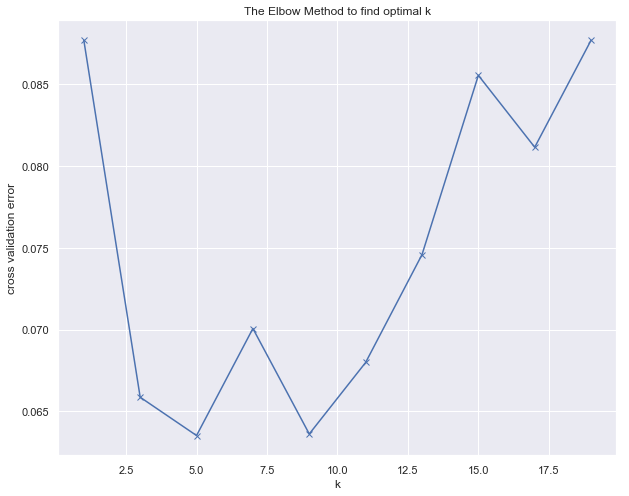

In [112]:
plt.figure(figsize=(10,8))
plt.plot(neighbors1, mse,'bx-')
plt.xlabel('k')
plt.ylabel('cross validation error')
plt.title('The Elbow Method to find optimal k')
plt.show()

From the above plot we can easily see that the error is minimum at the value of K=5. So let us built a model using knn with k=5.

### Building KNN algorithm and applying it on the test data.

In [109]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.973684


### Displaying the different metrics of classification

In [76]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        75
           M       1.00      0.92      0.96        39

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



## Confusion matrix

In [78]:
cm_NB = confusion_matrix(y_test, y_pred)
print(cm_NB)

[[75  0]
 [ 3 36]]


### Conculsion:

The best values hyperparameter for KNN algorithm for predicting the best cancer is 5. Also, I will see if I can improve this more by tweaking the model further and trying out other models in a later version of this analysis.